# Libreta de modelos predictores

## Trabajo de Fin de Grado

### Convocatoria especial de finalización de estudios 2024-2025

### Alumno: Javier Domingo Collado

### Tutores: Pablo Bermejo López y José Antonio Gámez Martín

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
random_state = 345387

#Imports
import matplotlib
from pathlib import Path
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
target = 'Bebedor_Riesgo'
filepath_or_buffer = Path('.') / 'BasededatoslimpiaconFerrit.csv'

dtype = {target: 'int64'}

arguments = {'filepath_or_buffer': filepath_or_buffer, 'dtype': dtype}

data = pd.read_csv(**arguments)
data = data.drop(columns=['CASOS', 'NIV_EST', 'EST_CIV', 'UBES_TOTAL'])

data

,SEXO,EDAD,BAS,BAS_PERCENT,CHCM,CREA,EOS,EOS_PERCENT,ERITRO,FERRIT,...,MONOS,MONOS_PERCENT,MPXI,NEUTR,NEUTR_PERCENT,PLAQ,URE,VCM,VPM,Bebedor_Riesgo
0,1.0,45.579740,0.04,0.5,34.800000,0.97,0.16,2.0,5.64,80.000000,...,0.56,7.0,-8.7,3.82,48.200000,210.0,35.0,89.500000,9.2,1
1,2.0,54.417522,0.04,0.5,33.800000,0.65,0.76,8.5,4.17,168.626506,...,0.02,0.2,-2.8,0.09,1.000000,315.0,32.0,98.900000,8.3,1
2,1.0,56.495551,0.05,0.5,33.100000,1.02,0.46,4.9,4.57,98.000000,...,0.48,5.0,1.7,5.63,59.000000,258.0,37.0,94.900000,9.3,1
3,1.0,40.829569,0.06,0.6,31.300000,0.71,0.14,1.5,4.90,243.000000,...,0.59,6.5,-3.5,5.28,58.200000,238.0,23.0,102.900000,10.1,1
4,1.0,43.770021,0.04,0.7,34.400000,0.88,0.10,1.7,4.58,426.000000,...,0.29,4.9,-0.2,2.96,49.800000,141.0,30.0,94.000000,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2.0,34.524298,0.01,0.2,32.599998,0.75,0.13,1.6,4.47,56.000000,...,0.50,6.1,1.2,5.18,63.099998,237.0,27.0,93.199997,10.2,0
332,1.0,39.110198,0.03,0.3,34.900002,0.94,0.27,3.1,4.82,105.000000,...,0.78,9.0,1.0,4.45,51.099998,186.0,44.0,94.599998,9.2,0
333,1.0,31.047228,0.04,0.5,33.799999,1.24,0.11,1.5,4.95,177.000000,...,0.31,4.1,0.8,4.90,64.699997,141.0,43.0,87.099998,8.4,0
334,2.0,43.099247,0.04,0.5,30.700001,0.67,0.19,2.5,4.34,14.000000,...,0.36,4.8,-0.6,4.78,64.000000,207.0,24.0,95.000000,11.7,0


# Arbol de decisión simple con Decision Tree

Hemos probado diferentes modelos con `hiperparámetros` diferentes, cambiando el `criterion` por:
- `gini`
- `entropy`
- `log_loss`

Además de modificar `max_depth` con `[None, 5, 10, 15, 20]`, obteniendo así 15 modelos diferentes de `DecissionTree`.

### Resultados obtenidos


Fitting 336 folds for each of 12 candidates, totalling 4032 fits
Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 2}
Accuracy: 0.7946428571428571
Recall: 0.8011363636363636
Precision: 0.8057142857142857
F1-score: 0.8034188034188035


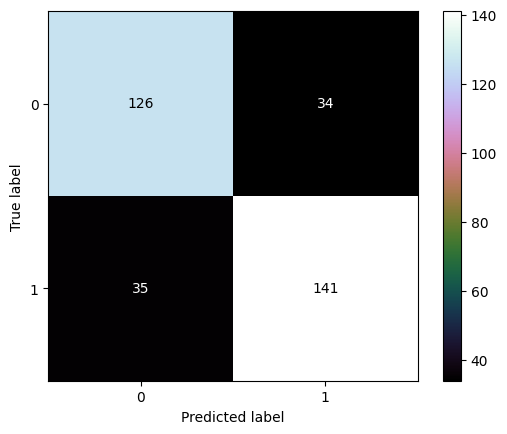

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
import numpy as np

# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5] # se ha probado con 6, 7, 8, 9, 10, 15, 20
}

# Configuración del modelo base
model = DecisionTreeClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results = {}
# Evaluación del mejor modelo con diferentes promedios para recall y f1-score
results['DecisionTree'] = {}

# Diccionarios para almacenar métricas y valores
actual_values = {'binary': []}
predicted_values = {'binary': []}

# Evaluación Leave-One-Out
for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')  # Cambiar promedio según necesidad
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos las métricas calculadas
results['DecisionTree'][f"Best Model - criterion: {best_params['criterion']}, max_depth: {best_params['max_depth']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Decission Tree con weight

Fitting 336 folds for each of 48 candidates, totalling 16128 fits
Mejores parámetros encontrados: {'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'entropy', 'max_depth': 5}
Accuracy: 0.8214285714285714
Recall: 0.8214285714285714
Precision: 0.8336356764928193
F1-score: 0.818678730595829


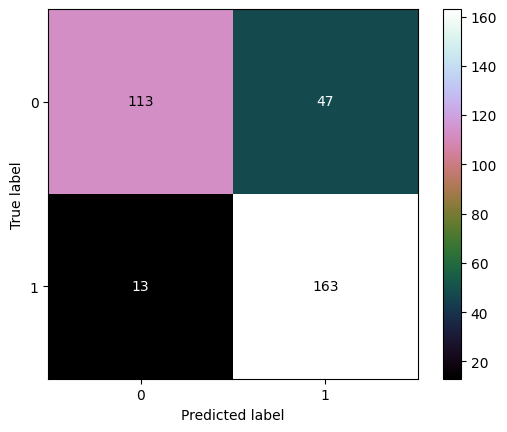

In [5]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5],  # Se puede extender según necesidad
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8},{0: 1, 1: 2}]  # Añadimos el hiperparámetro class_weight
}

# Configuración del modelo base
model = DecisionTreeClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Diccionarios para almacenar métricas y valores
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

# Evaluación Leave-One-Out
for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos las métricas calculadas
results['DecisionTree'][f"Best Model - criterion: {best_params['criterion']}, max_depth: {best_params['max_depth']}, class_weight: {best_params['class_weight']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Arbol de clasificacion con metodo wrapper

**Selección de características con SFS y ajuste de hiperparámetros**:
- El clasificador de Random Forest se configura con diferentes combinaciones de parámetros (`n_estimators` y `max_depth`) y se aplica un `GridSearchCV` para obtener la mejor configuración del modelo.
- Para cada combinación, `SFS` realiza la selección de características mediante validación cruzada, seleccionando las que optimizan la métrica de precisión (`accuracy`).

#### Resultados obtenidos




Características seleccionadas con SFS para el mejor modelo: ['SEXO', 'BAS_PERCENT', 'CREA', 'FERRIT', 'HCM', 'IDH', 'NEUTR', 'PLAQ']
Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'max_depth': 7, 'n_estimators': 25}
Accuracy: 0.8422619047619048
Recall: 0.8920454545454546
Precision: 0.8219895287958116
F1-score: 0.8555858310626703


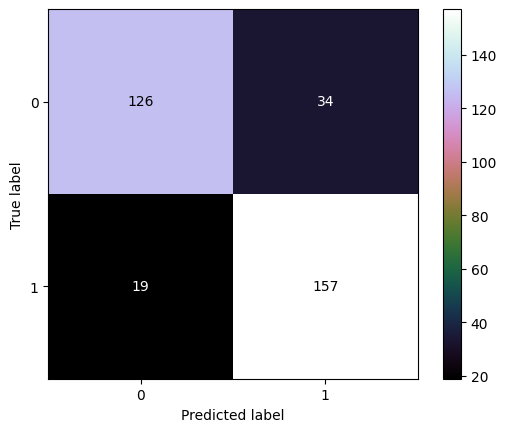

In [6]:
# Importar librerías adicionales para SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
}

# Configuración del modelo base
model = RandomForestClassifier(random_state=random_state)

# Realizamos la selección de características con SFS usando el mejor modelo y LOO
sfs = SFS(model,  # Modelo a evaluar
          k_features="best",  # Número de características óptimo, puede ajustarse o definirse fijo
          forward=True,       # Selección hacia adelante
          floating=False,     # No utiliza eliminación condicional
          scoring='accuracy', # Métrica de evaluación para la selección de características
          cv=5)              # Usamos Leave-One-Out para la validación cruzada interna

# Realizamos el proceso de selección de características con SFS
sfs = sfs.fit(x, y)
selected_features = list(sfs.k_feature_names_)
print(f"\nCaracterísticas seleccionadas con SFS para el mejor modelo: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RandomForestSFS'] = {}

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['RandomForestSFS'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()


Características seleccionadas con SFS para el mejor modelo: ['SEXO', 'BAS_PERCENT', 'CREA', 'FERRIT', 'HCM', 'IDH', 'NEUTR', 'PLAQ']
Fitting 336 folds for each of 64 candidates, totalling 21504 fits
Mejores parámetros encontrados: {'class_weight': {0: 1, 1: 2}, 'max_depth': 5, 'n_estimators': 22}
Accuracy: 0.8422619047619048
Recall: 0.8422619047619048
Precision: 0.8489826002263813
F1-score: 0.8408081301126303


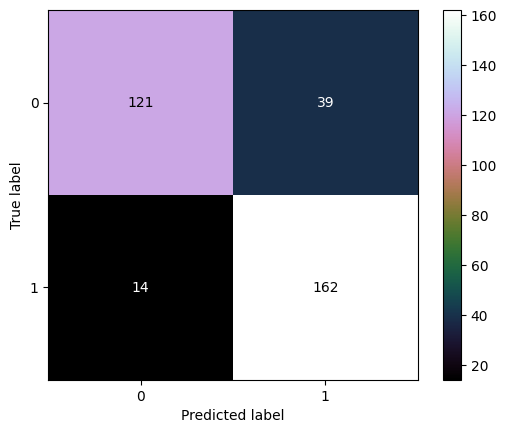

In [7]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]  # Añadimos el hiperparámetro class_weight
}

model = RandomForestClassifier(random_state=random_state)
print(f"\nCaracterísticas seleccionadas con SFS para el mejor modelo: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos los resultados
results['RandomForestSFS'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, class_weight: {best_params['class_weight']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# METODO FILTER

En esta celda, se aplica el método **Filter** para seleccionar características relevantes. Este método evalúa cada característica de forma independiente, en este caso, mediante **Información Mutua** (`mutual_info_classif`). Este criterio mide la dependencia entre las características y la variable objetivo, seleccionando solo aquellas que aportan información significativa (en este caso, con un umbral de 0.01).

### Configuración de Hiperparámetros

Se utiliza un modelo de **Random Forest** con varias combinaciones de hiperparámetros:
- `n_estimators`: cantidad de árboles en el bosque (10, 50 y 100).
- `max_depth`: profundidad máxima del árbol (valores de `None`, 5 y 10).

Se vuelve a aplicar `GridSearchCV` para obtener la mejor configuración.

### Resultados



Características seleccionadas con método filter: ['BAS', 'LUC_', 'BAS_PERCENT', 'EOS', 'FERRIT', 'VPM', 'HCM', 'LUC_PERCENT', 'MONOS_PERCENT', 'MONOS', 'CHCM', 'IDH', 'EOS_PERCENT', 'URE', 'VCM', 'GOT', 'CREA', 'HB', 'LINF', 'EDAD', 'ERITRO', 'HCTO', 'NEUTR', 'LINF_PERCENT', 'GLU', 'LEU_', 'PLAQ']
Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'max_depth': 5, 'n_estimators': 25}

Accuracy: 0.8303571428571429
Recall: 0.8409090909090909
Precision: 0.8361581920903954
F1-score: 0.8385269121813032


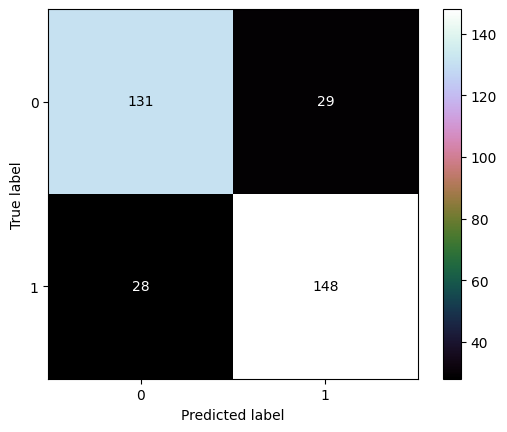

In [8]:
# Importar librerías necesarias
from sklearn.feature_selection import mutual_info_classif

# Definir X e y
x = data.drop(columns=[target])  # Eliminar columna objetivo para obtener características
y = data[target]  # Columna objetivo

# Calcular la información mutua para selección de características
mi = mutual_info_classif(x, y, random_state=random_state)
importances_df = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
importances_df = importances_df.sort_values(by='Mutual Information', ascending=False)
selected_features = importances_df[importances_df['Mutual Information'] > 0.01]['Feature'].tolist()
print(f"\nCaracterísticas seleccionadas con método filter: {selected_features}")

# Redefinir X con las características seleccionadas
x_selected = x[selected_features]

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
}

# Configuración del modelo base
model = RandomForestClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperar el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

# Calcular métricas finales
actual_combined = np.array(actual_values['binary'])
predicted_combined = np.array(predicted_values['binary'])

cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenar resultados
results['RandomForestMI'] = {
    f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: binary": {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f_measure": f_measure
    }
}

# Imprimir métricas
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

Fitting 336 folds for each of 64 candidates, totalling 21504 fits
Mejores parámetros encontrados: {'class_weight': {0: 1, 1: 2}, 'max_depth': 4, 'n_estimators': 20}

Accuracy: 0.8422619047619048
Recall: 0.8422619047619048
Precision: 0.8531144173206864
F1-score: 0.8401855597099844


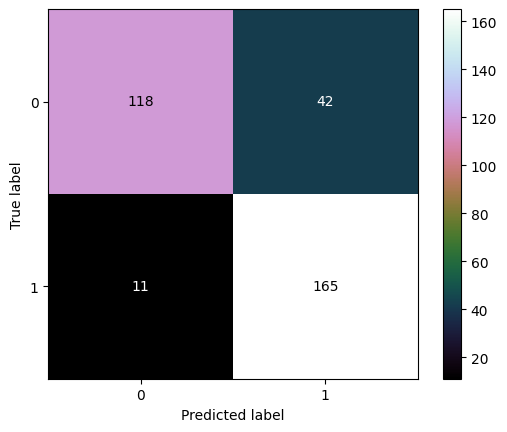

In [9]:
# Actualizar los parámetros para incluir class_weight
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]  # Pesos para clases desbalanceadas
}

# Configuración del modelo base
model = RandomForestClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperar el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

# Calcular métricas finales
actual_combined = np.array(actual_values['weighted'])
predicted_combined = np.array(predicted_values['weighted'])

cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenar resultados
results['RandomForestMI'] = {
    f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, class_weight: {best_params['class_weight']}, average: weighted": {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f_measure": f_measure
    }
}

# Imprimir métricas
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Arbol de clasifcación con base de datos original

Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'max_depth': 3, 'n_estimators': 20}
Accuracy: 0.8184523809523809
Recall: 0.8352272727272727
Precision: 0.8212290502793296
F1-score: 0.828169014084507


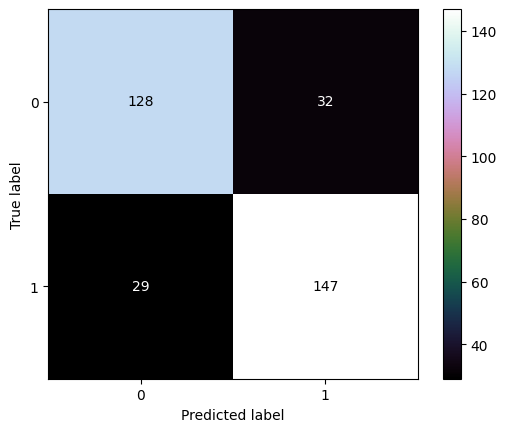

In [10]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
}

# Configuración del modelo base
model = RandomForestClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RandomForest'] = {}
# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['RandomForest'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

## Obtener feature_importances

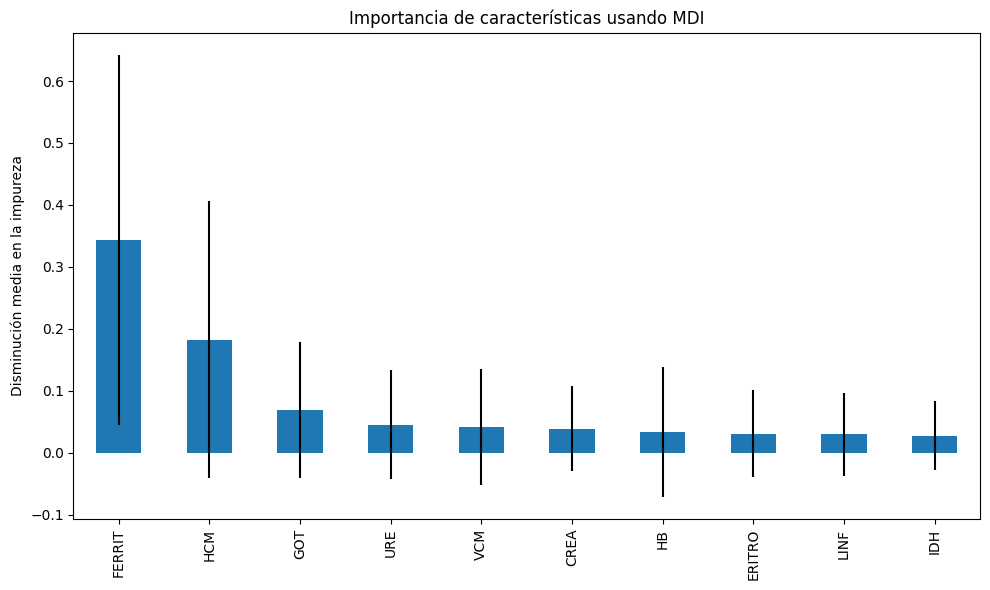

In [11]:
# Importancia de las características
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

# Convertimos std a una Serie de pandas para alinear índices
std = pd.Series(std, index=x.columns)
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 variables más importantes
forest_importances = forest_importances.nlargest(10)
std = std[forest_importances.index]  # Seleccionamos la desviación estándar correspondiente

# Mostramos en gráfica las 10 características más importantes
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de características usando MDI")
ax.set_ylabel("Disminución media en la impureza")
fig.tight_layout()
plt.show()

In [12]:
# Importancia de las características
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 características más importantes
top_10 = forest_importances.nlargest(10).index

# Crear un nuevo DataFrame con solo las 10 características más importantes y la columna objetivo
data_top_10 = data[top_10.tolist() + [target]]

# Mostrar el nuevo DataFrame
data_top_10.head()

,FERRIT,HCM,GOT,URE,VCM,CREA,HB,ERITRO,LINF,IDH,Bebedor_Riesgo
0,80.000000,31.2,25.0,35.0,89.5,0.97,17.6,5.64,3.15,14.3,1
1,168.626506,33.4,17.0,32.0,98.9,0.65,14.0,4.17,2.69,14.0,1
2,98.000000,31.4,18.0,37.0,94.9,1.02,14.3,4.57,2.77,13.4,1
3,243.000000,32.2,21.0,23.0,102.9,0.71,15.8,4.90,2.76,13.8,1
4,426.000000,32.3,146.0,30.0,94.0,0.88,14.8,4.58,2.42,14.5,1


# RandomForest 10 mejores

Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'max_depth': 5, 'n_estimators': 27}
Accuracy: 0.8273809523809523
Recall: 0.8465909090909091
Precision: 0.8277777777777777
F1-score: 0.8370786516853933


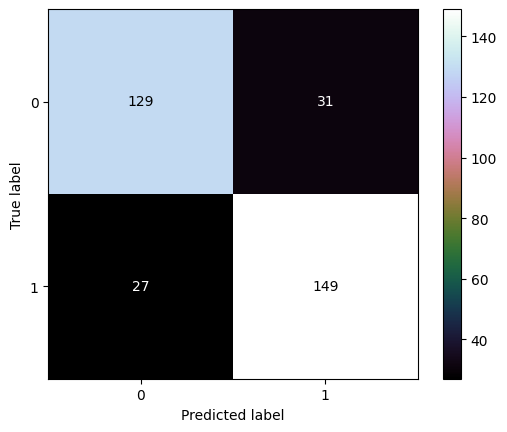

In [13]:
# Definimos x e y
x = data_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_top_10[target]  # Definimos la columna objetivo

# Parámetros para GridSearch
param_grid = {
    'n_estimators': [20, 22, 25, 27],  # Número de árboles
    'max_depth': [3, 4, 5, 7],   # Profundidad máxima
}

# Configuración del modelo base
model = RandomForestClassifier(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RandomForest10MejoresFI'] = {}
# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['RandomForest10MejoresFI'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# RandomForest Weight

Fitting 336 folds for each of 64 candidates, totalling 21504 fits
Mejores parámetros encontrados con class_weight: {'class_weight': {0: 0.4, 1: 0.6}, 'max_depth': 4, 'n_estimators': 22}
Accuracy (weighted): 0.8273809523809523
Recall (weighted): 0.8273809523809523
Precision (weighted): 0.8303290533579484
F1-score (weighted): 0.8264355178262464


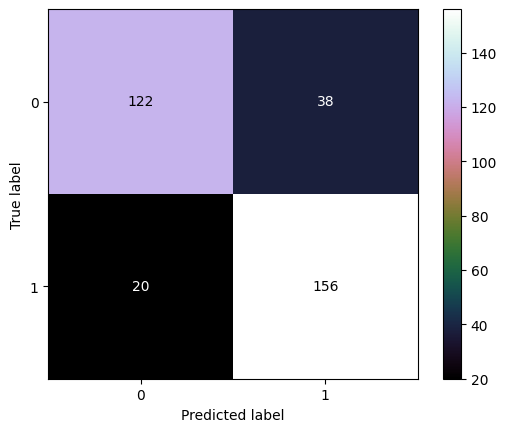

In [14]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Modificación de parámetros para incluir class_weight
param_grid = {
    'n_estimators': [20, 22, 25, 27],
    'max_depth': [3, 4, 5, 7],
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]
}

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=random_state),
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados con class_weight: {best_params}")

# Evaluación del mejor modelo con 'weighted'
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])
predicted_combined = np.array(predicted_values['weighted'])

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenar resultados
results['RandomForest'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy (weighted): {accuracy}")
print(f"Recall (weighted): {recall}")
print(f"Precision (weighted): {precision}")
print(f"F1-score (weighted): {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Proceso de obtención de las variables más importantes a la hora de predecir

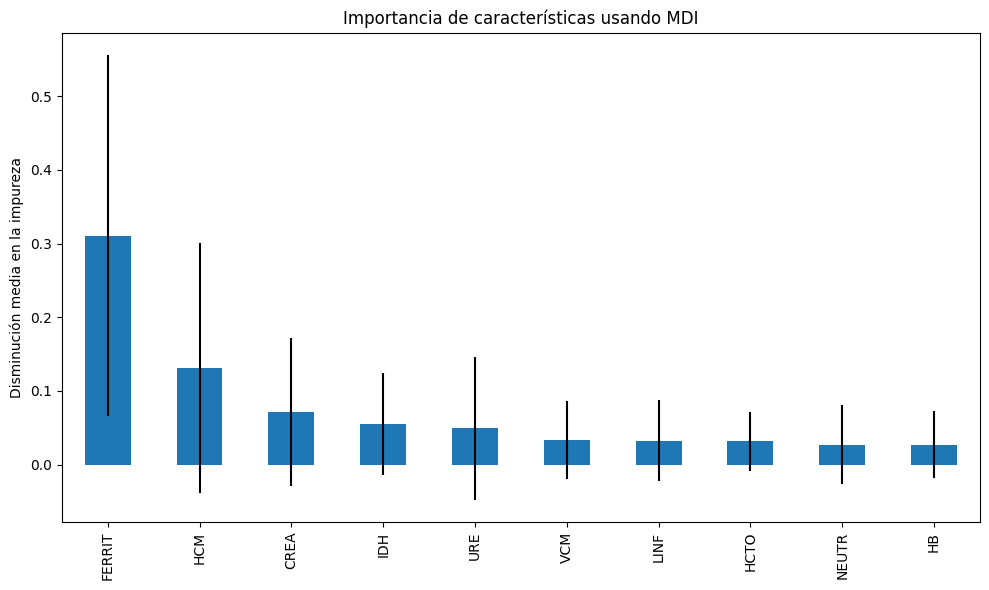

In [15]:
# Importancia de las características
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

# Convertimos std a una Serie de pandas para alinear índices
std = pd.Series(std, index=x.columns)
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 variables más importantes
forest_importances = forest_importances.nlargest(10)
std = std[forest_importances.index]  # Seleccionamos la desviación estándar correspondiente

# Mostramos en gráfica las 10 características más importantes
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de características usando MDI")
ax.set_ylabel("Disminución media en la impureza")
fig.tight_layout()
plt.show()

In [16]:
# Importancia de las características
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 características más importantes
top_10 = forest_importances.nlargest(10).index

# Crear un nuevo DataFrame con solo las 10 características más importantes y la columna objetivo
data_top_10 = data[top_10.tolist() + [target]]

# Mostrar el nuevo DataFrame
data_top_10.head()

,FERRIT,HCM,CREA,IDH,URE,VCM,LINF,HCTO,NEUTR,HB,Bebedor_Riesgo
0,80.000000,31.2,0.97,14.3,35.0,89.5,3.15,50.5,3.82,17.6,1
1,168.626506,33.4,0.65,14.0,32.0,98.9,2.69,41.3,0.09,14.0,1
2,98.000000,31.4,1.02,13.4,37.0,94.9,2.77,43.4,5.63,14.3,1
3,243.000000,32.2,0.71,13.8,23.0,102.9,2.76,50.4,5.28,15.8,1
4,426.000000,32.3,0.88,14.5,30.0,94.0,2.42,43.0,2.96,14.8,1


# Arbol de clasifación con las 10 mejores características

Hemos probado diferentes configuraciones de `RandomForest` utilizando los 10 mejores atributos, probando varias combinaciones de los hiperparámetros `n_estimators` y `max_depth`. Los valores de `n_estimators` probados fueron `[10, 50, 100]` y para `max_depth` se probaron los valores `[None, 5, 10]`, lo que resultó en 10 modelos diferentes de `RandomForest`. 

Su optimización se realiza mediante `GridSearch`.

### Resultados obtenidos



Fitting 336 folds for each of 64 candidates, totalling 21504 fits
Mejores parámetros encontrados con class_weight: {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 4, 'n_estimators': 25}
Accuracy (weighted): 0.8511904761904762
Recall (weighted): 0.8511904761904762
Precision (weighted): 0.8575770308123248
F1-score (weighted): 0.8499068977792381


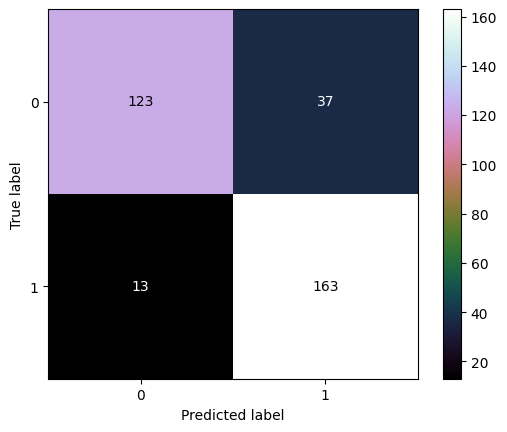

In [17]:
# Definimos x e y
x = data_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_top_10[target]  # Definimos la columna objetivo

# Modificación de parámetros para incluir class_weight
param_grid = {
    'n_estimators': [20, 22, 25, 27],
    'max_depth': [3, 4, 5, 7],
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]
}

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=random_state),
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados con class_weight: {best_params}")

# Evaluación del mejor modelo con 'weighted'
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])
predicted_combined = np.array(predicted_values['weighted'])

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenar resultados
results['RandomForest10MejoresFI'][f"Best Model - n_estimators: {best_params['n_estimators']}, max_depth: {best_params['max_depth']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy (weighted): {accuracy}")
print(f"Recall (weighted): {recall}")
print(f"Precision (weighted): {precision}")
print(f"F1-score (weighted): {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Red bayesiana con base de datos

### Naive Bayes con diferentes configuraciones de `var_smoothing`

Hemos evaluado el modelo de clasificación **Naive Bayes** utilizando diferentes configuraciones del hiperparámetro `var_smoothing`, el cual regula la suavización de las varianzas en el modelo. Los valores probados para `var_smoothing` fueron `[1e-09, 1e-08, 1e-07]`. Se realizó una validación cruzada Leave-One-Out (LOOCV) para evaluar el desempeño de cada configuración del modelo.

### Resultados obtenidos



In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

encoder = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["SEXO"]),
    remainder = "passthrough",
    verbose_feature_names_out = False
)

encoder


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEXO'])],
                  verbose_feature_names_out=False)

In [19]:
from sklearn.pipeline import make_pipeline

preprocessing = make_pipeline(encoder)
preprocessing

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SEXO'])],
                                   verbose_feature_names_out=False))])

In [20]:

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(data)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

# Mostrar el DataFrame transformado
transformed_df.head()


,SEXO_1.0,SEXO_2.0,EDAD,BAS,BAS_PERCENT,CHCM,CREA,EOS,EOS_PERCENT,ERITRO,...,MONOS,MONOS_PERCENT,MPXI,NEUTR,NEUTR_PERCENT,PLAQ,URE,VCM,VPM,Bebedor_Riesgo
0,1.0,0.0,45.579740,0.04,0.5,34.8,0.97,0.16,2.0,5.64,...,0.56,7.0,-8.7,3.82,48.2,210.0,35.0,89.5,9.2,1.0
1,0.0,1.0,54.417522,0.04,0.5,33.8,0.65,0.76,8.5,4.17,...,0.02,0.2,-2.8,0.09,1.0,315.0,32.0,98.9,8.3,1.0
2,1.0,0.0,56.495551,0.05,0.5,33.1,1.02,0.46,4.9,4.57,...,0.48,5.0,1.7,5.63,59.0,258.0,37.0,94.9,9.3,1.0
3,1.0,0.0,40.829569,0.06,0.6,31.3,0.71,0.14,1.5,4.90,...,0.59,6.5,-3.5,5.28,58.2,238.0,23.0,102.9,10.1,1.0
4,1.0,0.0,43.770021,0.04,0.7,34.4,0.88,0.10,1.7,4.58,...,0.29,4.9,-0.2,2.96,49.8,141.0,30.0,94.0,10.5,1.0


Fitting 336 folds for each of 4 candidates, totalling 1344 fits
Mejores parámetros encontrados: {'var_smoothing': 1e-09}
Accuracy: 0.6845238095238095
Recall: 0.48863636363636365
Precision: 0.8431372549019608
F1-score: 0.6187050359712231


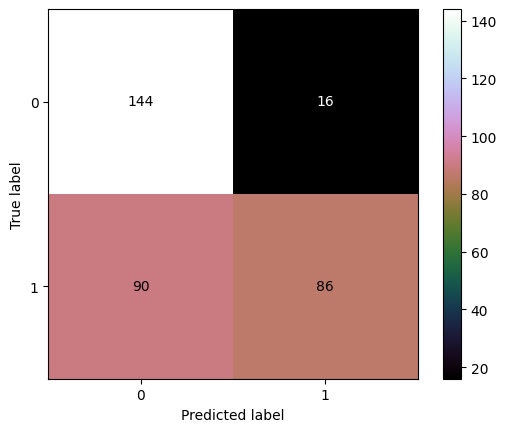

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Hiperparámetro var_smoothing
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)


# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['NaiveBayes'] = {}
# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['NaiveBayes'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Red Bayesiana con Weight

Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'priors': [0.2, 0.8], 'var_smoothing': 1e-06}
Accuracy: 0.7053571428571429
Recall: 0.7053571428571429
Precision: 0.7462319462319462
F1-score: 0.6968641114982578


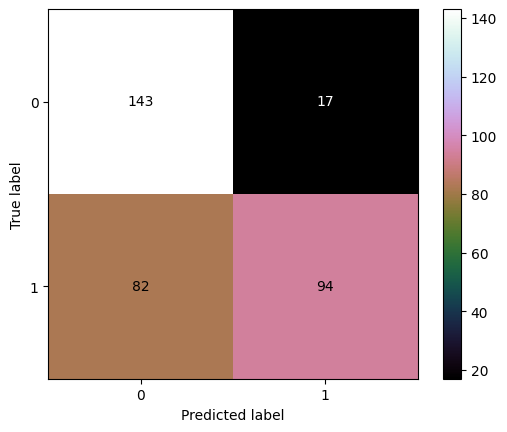

In [22]:
# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # Hiperparámetro var_smoothing
    'priors': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],[1,2]]  # Priors para las clases
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)


# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)


# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos los resultados
results['NaiveBayes'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, priors: {best_params.get('priors')}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Red bayesiana con SFS


Características seleccionadas con Sequential Forward Selection: Index(['SEXO_1.0', 'EDAD', 'BAS', 'BAS_PERCENT', 'CHCM', 'CREA', 'GLU', 'HCM',
       'HCTO', 'IDH', 'MONOS', 'MPXI', 'NEUTR', 'URE', 'VCM'],
      dtype='object')
Fitting 336 folds for each of 4 candidates, totalling 1344 fits
Mejores parámetros encontrados: {'var_smoothing': 1e-06}
Accuracy: 0.7797619047619048
Recall: 0.7159090909090909
Precision: 0.84
F1-score: 0.7730061349693251


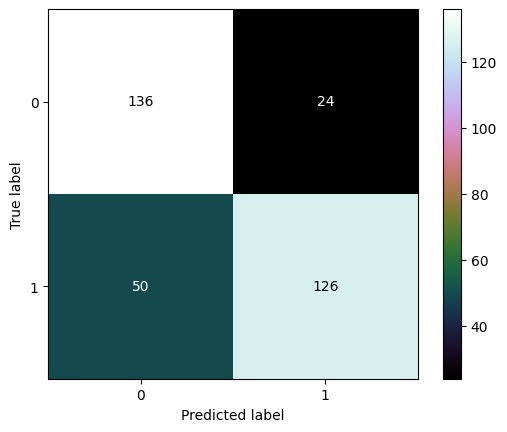

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)

SequentialFeatureSelector
sfs = SequentialFeatureSelector(
    estimator=GaussianNB(),
    n_features_to_select=15,  # O puedes especificar un número fijo
    direction="forward",
    scoring="accuracy",
)
# Selección de características: Sequential Forward Selection (SFS)
#sfs = SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select="auto", direction="forward")


sfs.fit(x, y)
selected_features = x.columns[sfs.get_support()]  # Características seleccionadas
print(f"\nCaracterísticas seleccionadas con Sequential Forward Selection: {selected_features}")

# Crear DataFrame con solo las características seleccionadas
x_sfs = x[selected_features]


# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Hiperparámetro var_smoothing
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)


# Realizamos el GridSearch
grid_search.fit(x_sfs, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['NaiveBayesSFS'] = {}
# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x_sfs):
    x_train, x_test = x_sfs.iloc[train_index], x_sfs.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['NaiveBayesSFS'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'priors': [0.2, 0.8], 'var_smoothing': 1e-09}
Accuracy: 0.7886904761904762
Recall: 0.7886904761904762
Precision: 0.789276784539319
F1-score: 0.7881309628882446


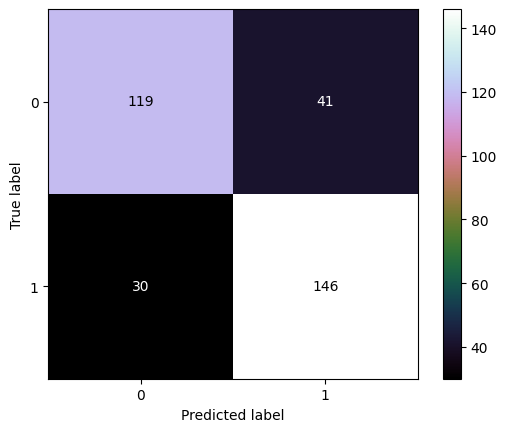

In [24]:
# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)


# Crear DataFrame con solo las características seleccionadas
x_sfs = x[selected_features]

# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # Hiperparámetro var_smoothing
    'priors': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],[1,2]]  # Priors para las clases
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)


# Realizamos el GridSearch
grid_search.fit(x_sfs, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x_sfs):
    x_train, x_test = x_sfs.iloc[train_index], x_sfs.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos los resultados
results['NaiveBayesSFS'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Red bayesiana con las 10 mejores variables

Los `hiperparametros` modificados son los mismos que `NaiveBayes` sin las mejores variables predictoras obtenidas por `SFS`.

### Resultados obtenidos




Características seleccionadas con Sequential Forward Selection: Index(['SEXO_1.0', 'EDAD', 'BAS_PERCENT', 'CHCM', 'HCM', 'HCTO', 'MONOS',
       'MPXI', 'URE', 'VCM'],
      dtype='object')
Fitting 336 folds for each of 4 candidates, totalling 1344 fits
Mejores parámetros encontrados: {'var_smoothing': 1e-09}
Accuracy: 0.7738095238095238
Recall: 0.75
Precision: 0.8048780487804879
F1-score: 0.7764705882352941


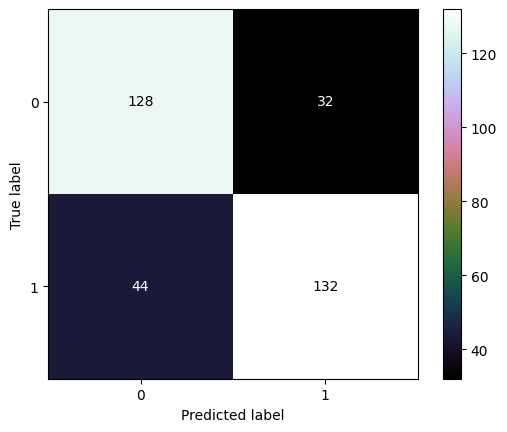

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)

SequentialFeatureSelector
sfs = SequentialFeatureSelector(
    estimator=GaussianNB(),
    n_features_to_select=10,  # O puedes especificar un número fijo
    direction="forward",
    scoring="accuracy",
)
# Selección de características: Sequential Forward Selection (SFS)
#sfs = SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select="auto", direction="forward")


sfs.fit(x, y)
selected_features = x.columns[sfs.get_support()]  # Características seleccionadas
print(f"\nCaracterísticas seleccionadas con Sequential Forward Selection: {selected_features}")

# Crear DataFrame con solo las características seleccionadas
x_sfs = x[selected_features]


# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Hiperparámetro var_smoothing
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)


# Realizamos el GridSearch
grid_search.fit(x_sfs, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['NaiveBayes10SFS'] = {}
# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x_sfs):
    x_train, x_test = x_sfs.iloc[train_index], x_sfs.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos los resultados
results['NaiveBayes10SFS'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Red Bayesiana 10 Mejores SFS Weight

Fitting 336 folds for each of 16 candidates, totalling 5376 fits
Mejores parámetros encontrados: {'priors': [0.4, 0.6], 'var_smoothing': 1e-09}
Accuracy: 0.7678571428571429
Recall: 0.7678571428571429
Precision: 0.7677631712619624
F1-score: 0.7677829046553064


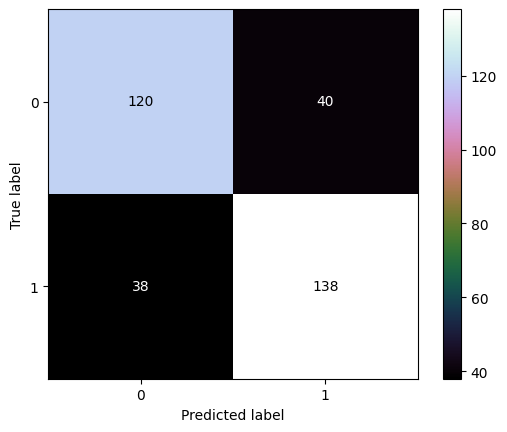

In [26]:
# Definir x e y
x = data.drop(columns=[target])  # Eliminar columna objetivo
y = data[target]  # Columna objetivo

# Fit y transformación del pipeline
transformed_data = preprocessing.fit_transform(x)

# Convertir la salida a DataFrame
# Recuperar los nombres de las columnas del preprocesador (encoder)
column_names = preprocessing.named_steps['columntransformer'].get_feature_names_out()

# Crear un DataFrame con las columnas transformadas
x = pd.DataFrame(transformed_data, columns=column_names)


# Crear DataFrame con solo las características seleccionadas
x_sfs = x[selected_features]

# Parámetros para GridSearch
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # Hiperparámetro var_smoothing
    'priors': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],[1,2]]  # Priors para las clases
}

# Configuración del modelo base
bayesian_model = GaussianNB()

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=bayesian_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)


# Realizamos el GridSearch
grid_search.fit(x_sfs, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x_sfs):
    x_train, x_test = x_sfs.iloc[train_index], x_sfs.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos los resultados
results['NaiveBayes10SFS'][f"Best Model - var_smoothing: {best_params['var_smoothing']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# REGRESIÓN LOGÍSTICA

Fitting 336 folds for each of 20 candidates, totalling 6720 fits
Mejores parámetros encontrados: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8154761904761905
Recall: 0.8181818181818182
Precision: 0.8275862068965517
F1-score: 0.8228571428571428


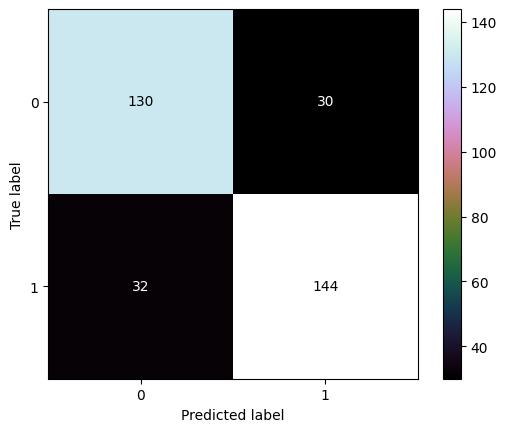

In [27]:
from sklearn.linear_model import LogisticRegression

# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Métodos de optimización
    'penalty': ['l1', 'l2']  # Tipos de penalización
}

# Configuración del modelo base
logistic_model = LogisticRegression(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RegresionLogistica'] = {}
# Diccionarios para almacenar métricas y valores
actual_values = {'binary': []}
predicted_values = {'binary': []}

# Evaluación Leave-One-Out
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')  # Cambiar promedio según necesidad
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos las métricas calculadas
results['RegresionLogistica'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

## Regresión Logística con weight 

Fitting 336 folds for each of 40 candidates, totalling 13440 fits
Mejores parámetros encontrados: {'C': 0.01, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8214285714285714
Recall: 0.8214285714285714
Precision: 0.8320741758241759
F1-score: 0.8189484126984126


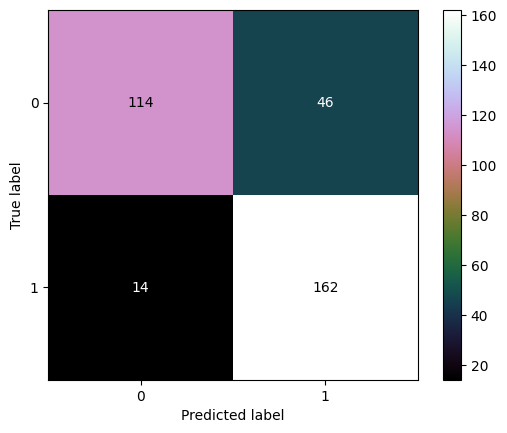

In [28]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch, incluyendo class_weight
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear'],  # Usamos 'liblinear' porque admite penalización l1 y l2 con class_weight
    'penalty': ['l1', 'l2'],  # Tipos de penalización
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]  # Pesos para las clases
}

# Configuración del modelo base
logistic_model = LogisticRegression(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Diccionarios para almacenar métricas y valores
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

# Evaluación Leave-One-Out
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')  # Cambiar promedio a 'weighted'
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos las métricas calculadas
results['RegresionLogistica'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, class_weight: {best_params['class_weight']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

## Filtrar variables que tengan un p valor inferior a 0.05

In [29]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definimos x e y directamente
x = data.drop(columns=[target])  
y = data[target]  # Definimos la columna objetivo

# Paso 1: Eliminar columnas constantes
x = x.loc[:, (x != x.iloc[0]).any()]  # Elimina columnas que tienen un valor constante

# Paso 2: Eliminar variables altamente correlacionadas
corr_matrix = x.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
x = x.drop(columns=high_corr_features)  # Eliminamos las columnas con alta correlación

# Paso 3: Normalizar las variables para evitar problemas numéricos
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Paso 4: Eliminar variables con alto VIF (multicolinealidad residual)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Eliminar las variables con VIF superior a 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
x = x.drop(columns=high_vif_features)

# Paso 5: Añadir una constante para el término independiente en statsmodels
x = sm.add_constant(x)

# Ajustamos el modelo de regresión logística con statsmodels
# Aumentamos maxiter a 100 y cambiamos el método a 'lbfgs'
logit_model = sm.Logit(y, x)
result = logit_model.fit(method='lbfgs', maxiter=100)

# Mostramos el resumen del modelo, que incluye los p-valores
print(result.summary())

# Filtramos las variables con p-valor < 0.1
significant_vars = result.pvalues[result.pvalues < 0.05].index
print("\nVariables significativas (p < 0.05):")
print(significant_vars)

# Opcional: Crear un nuevo DataFrame solo con las variables significativas
x_significant = x[significant_vars]

                           Logit Regression Results                           
Dep. Variable:         Bebedor_Riesgo   No. Observations:                  336
Model:                          Logit   Df Residuals:                      319
Method:                           MLE   Df Model:                           16
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                  0.4136
Time:                        22:54:29   Log-Likelihood:                -136.34
converged:                       True   LL-Null:                       -232.52
Covariance Type:            nonrobust   LLR p-value:                 2.771e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0331      0.260      3.976      0.000       0.524       1.542
SEXO             -0.3770      0.187     -2.017      0.044      -0.743      -0.011
EDAD              0.3323      0.170     

# Regresión Logística con P valor < 0.05

Fitting 336 folds for each of 20 candidates, totalling 6720 fits
Mejores parámetros encontrados: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8214285714285714
Recall: 0.8068181818181818
Precision: 0.8452380952380952
F1-score: 0.8255813953488372


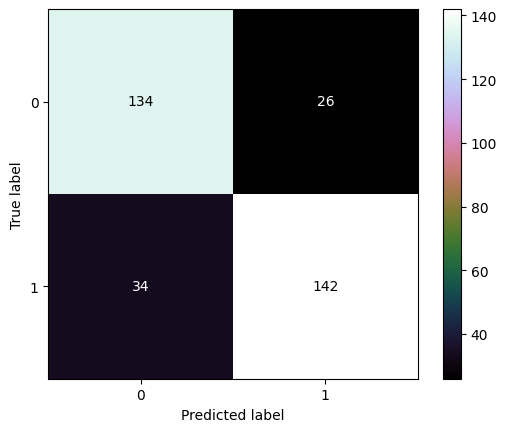

In [30]:
# Definimos x e y
x = x_significant  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Métodos de optimización
    'penalty': ['l1', 'l2']  # Tipos de penalización
}

# Configuración del modelo base
logistic_model = LogisticRegression(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RegresionLogisticaPvalor'] = {}
# Diccionarios para almacenar métricas y valores
actual_values = {'binary': []}
predicted_values = {'binary': []}

# Evaluación Leave-One-Out
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')  # Cambiar promedio según necesidad
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

# Almacenamos las métricas calculadas
results['RegresionLogisticaPvalor'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')

plt.show()

## Regresión Logística Pvalor < 0.05 weight

Fitting 336 folds for each of 40 candidates, totalling 13440 fits
Mejores parámetros encontrados: {'C': 0.01, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8214285714285714
Recall: 0.8214285714285714
Precision: 0.8320741758241759
F1-score: 0.8189484126984126


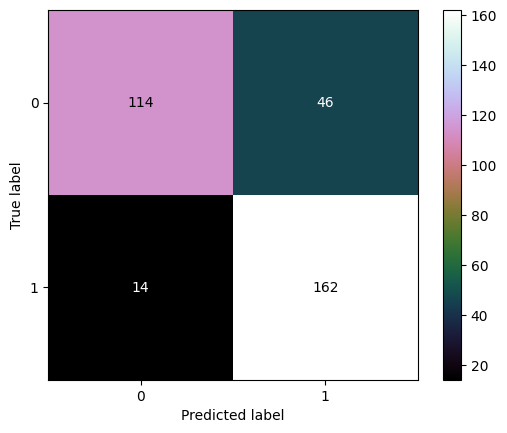

In [31]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch, incluyendo class_weight
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear'],  # Usamos 'liblinear' porque admite penalización l1 y l2 con class_weight
    'penalty': ['l1', 'l2'],  # Tipos de penalización
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]  # Pesos para las clases
}

# Configuración del modelo base
logistic_model = LogisticRegression(random_state=random_state)

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Diccionarios para almacenar métricas y valores
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

# Evaluación Leave-One-Out
loo = LeaveOneOut()
for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar y predecir con el mejor modelo
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')  # Cambiar promedio a 'weighted'
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos las métricas calculadas
results['RegresionLogisticaPvalor'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, class_weight: {best_params['class_weight']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

# Regresión Logistica con SFS


Características seleccionadas con método SFS para el mejor modelo: ['SEXO', 'BAS', 'BAS_PERCENT', 'CHCM', 'CREA', 'EOS', 'EOS_PERCENT', 'ERITRO', 'FERRIT', 'GLU', 'HB', 'HCM', 'HCTO', 'IDH', 'IDP', 'LEU_', 'LINF', 'LINF_PERCENT', 'LUC_PERCENT', 'LUC_', 'MONOS', 'MONOS_PERCENT', 'MPXI', 'NEUTR_PERCENT', 'PLAQ', 'URE', 'VCM', 'VPM']
Fitting 336 folds for each of 10 candidates, totalling 3360 fits
Mejores parámetros encontrados: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8184523809523809
Recall: 0.8295454545454546
Precision: 0.8248587570621468
F1-score: 0.8271954674220963


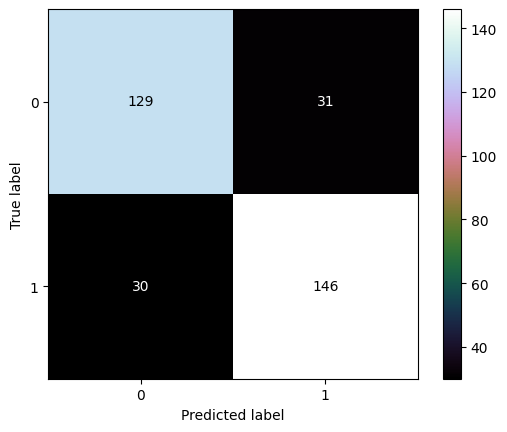

In [32]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Parámetros para GridSearch
# Definimos los hiperparámetros para GridSearch, incluyendo class_weight
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear'],  # Usamos 'liblinear' porque admite penalización l1 y l2 con class_weight
    'penalty': ['l1', 'l2'],  # Tipos de penalización
}

# Configuración del modelo base
model = LogisticRegression(random_state=random_state)

# Realizamos la selección de características con SFS usando el mejor modelo y LOO
sfs = SFS(model,  # Modelo a evaluar
          k_features="best",  # Número de características óptimo, puede ajustarse o definirse fijo
          forward=True,       # Selección hacia adelante
          floating=False,     # No utiliza eliminación condicional
          scoring='accuracy', # Métrica de evaluación para la selección de características
          cv=5)              # Usamos Leave-One-Out para la validación cruzada interna

# Realizamos el proceso de selección de características con SFS
sfs = sfs.fit(x, y)
selected_features = list(sfs.k_feature_names_)
print(f"\nCaracterísticas seleccionadas con método SFS para el mejor modelo: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

results['RegresionLogisticaSFS'] = {}

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'binary': []}
predicted_values = {'binary': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['binary'].append(y_test.iloc[0])
    predicted_values['binary'].append(y_pred[0])

actual_combined = np.array(actual_values['binary'])  # Valores reales
predicted_combined = np.array(predicted_values['binary'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='binary')
precision = precision_score(actual_combined, predicted_combined, average='binary')
f_measure = f1_score(actual_combined, predicted_combined, average='binary')

results['RegresionLogisticaSFS'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, average: binary"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()


Características seleccionadas con método SFS para el mejor modelo: ['SEXO', 'BAS', 'BAS_PERCENT', 'CHCM', 'CREA', 'EOS', 'EOS_PERCENT', 'ERITRO', 'FERRIT', 'GLU', 'HB', 'HCM', 'HCTO', 'IDH', 'IDP', 'LEU_', 'LINF', 'LINF_PERCENT', 'LUC_PERCENT', 'LUC_', 'MONOS', 'MONOS_PERCENT', 'MPXI', 'NEUTR_PERCENT', 'PLAQ', 'URE', 'VCM', 'VPM']
Fitting 336 folds for each of 40 candidates, totalling 13440 fits
Mejores parámetros encontrados: {'C': 0.01, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8244047619047619
Recall: 0.8244047619047619
Precision: 0.8344487778259264
F1-score: 0.8220933589224356


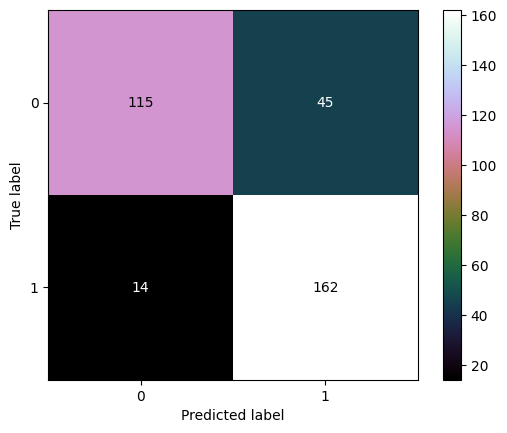

In [33]:
# Definimos x e y
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Definimos los hiperparámetros para GridSearch, incluyendo class_weight
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear'],  # Usamos 'liblinear' porque admite penalización l1 y l2 con class_weight
    'penalty': ['l1', 'l2'],  # Tipos de penalización
    'class_weight': [{0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 1, 1: 2}]  # Pesos para las clases
}

model = LogisticRegression(random_state=random_state)
print(f"\nCaracterísticas seleccionadas con método SFS para el mejor modelo: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Configuración de GridSearch con Leave-One-Out
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=1
)

# Realizamos el GridSearch
grid_search.fit(x_selected, y)

# Recuperamos los mejores parámetros y el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores parámetros encontrados: {best_params}")

# Evaluación del mejor modelo con Leave-One-Out
actual_values = {'weighted': []}
predicted_values = {'weighted': []}

for train_index, test_index in LeaveOneOut().split(x_selected):
    x_train, x_test = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento y predicción
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    
    # Guardar valores reales y predichos
    actual_values['weighted'].append(y_test.iloc[0])
    predicted_values['weighted'].append(y_pred[0])

actual_combined = np.array(actual_values['weighted'])  # Valores reales
predicted_combined = np.array(predicted_values['weighted'])  # Valores predichos

# Calcular matriz de confusión
cm = confusion_matrix(actual_combined, predicted_combined, labels=best_model.classes_)

# Calcular métricas
accuracy = accuracy_score(actual_combined, predicted_combined)
recall = recall_score(actual_combined, predicted_combined, average='weighted')
precision = precision_score(actual_combined, predicted_combined, average='weighted')
f_measure = f1_score(actual_combined, predicted_combined, average='weighted')

# Almacenamos las métricas calculadas
results['RegresionLogisticaSFS'][f"Best Model - C: {best_params['C']}, solver: {best_params['solver']}, penalty: {best_params['penalty']}, class_weight: {best_params['class_weight']}, average: weighted"] = {
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f_measure": f_measure
}

# Imprimir resultados
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f_measure}")

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='cubehelix', values_format='d')
plt.show()

In [34]:
results

{'DecisionTree': {'Best Model - criterion: entropy, max_depth: 2, average: binary': {'accuracy': 0.7946428571428571,
   'recall': np.float64(0.8011363636363636),
   'precision': np.float64(0.8057142857142857),
   'f_measure': np.float64(0.8034188034188035)},
  'Best Model - criterion: entropy, max_depth: 5, class_weight: {0: 0.4, 1: 0.6}, average: weighted': {'accuracy': 0.8214285714285714,
   'recall': np.float64(0.8214285714285714),
   'precision': np.float64(0.8336356764928193),
   'f_measure': np.float64(0.818678730595829)}},
 'RandomForestSFS': {'Best Model - n_estimators: 25, max_depth: 7, average: binary': {'accuracy': 0.8422619047619048,
   'recall': np.float64(0.8920454545454546),
   'precision': np.float64(0.8219895287958116),
   'f_measure': np.float64(0.8555858310626703)},
  'Best Model - n_estimators: 22, max_depth: 5, class_weight: {0: 1, 1: 2}, average: weighted': {'accuracy': 0.8422619047619048,
   'recall': np.float64(0.8422619047619048),
   'precision': np.float64(0.8

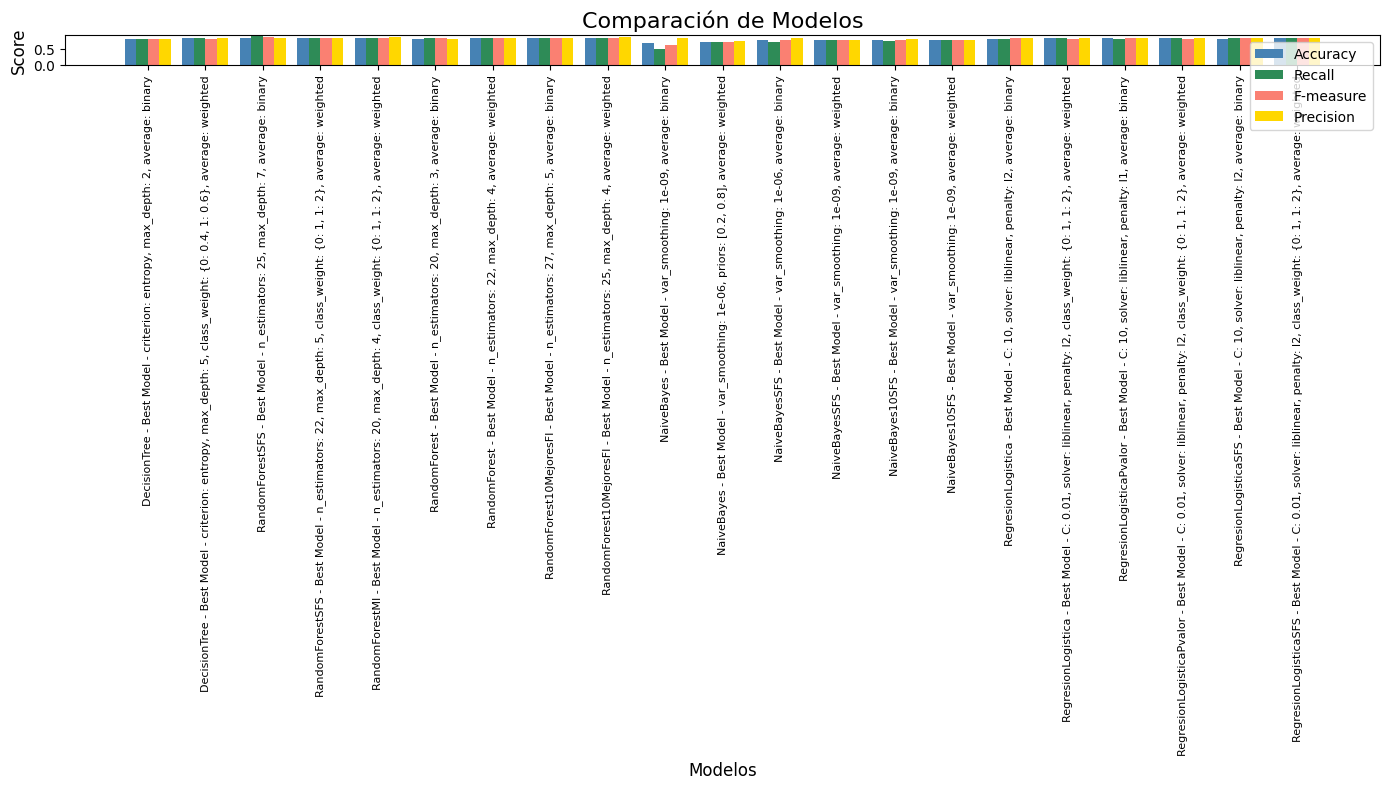

In [35]:
# Crear listas para almacenar datos
models = []
accuracies = []
recalls = []
f_measures = []
precisions = []  # Nueva lista para precisión

# Extraer datos de results
for model, metrics in results.items():
    for config, values in metrics.items():
        models.append(f"{model} - {config}")
        accuracies.append(values["accuracy"])
        recalls.append(values["recall"])
        f_measures.append(values["f_measure"])
        precisions.append(values["precision"])  # Agregar precisión

# Configurar la gráfica
x = np.arange(len(models))  # Índices de los modelos
width = 0.2  # Ancho de las barras (reducido para acomodar la precisión)

plt.figure(figsize=(14, 8))

# Barras de precisión (accuracy), recall, f_measure y precision
plt.bar(x - 1.5 * width, accuracies, width, label="Accuracy", color="steelblue")
plt.bar(x - 0.5 * width, recalls, width, label="Recall", color="seagreen")
plt.bar(x + 0.5 * width, f_measures, width, label="F-measure", color="salmon")
plt.bar(x + 1.5 * width, precisions, width, label="Precision", color="gold")  # Nueva barra

# Añadir etiquetas y formato
plt.xlabel("Modelos", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Comparación de Modelos", fontsize=16)
plt.xticks(x, models, rotation=90, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()


Mejor modelo para DecisionTree:
Configuración: Best Model - criterion: entropy, max_depth: 5, class_weight: {0: 0.4, 1: 0.6}, average: weighted
Accuracy: 0.8214285714285714
Recall: 0.8214285714285714
F-measure: 0.818678730595829
Precision: 0.8336356764928193


Mejor modelo para RandomForestSFS:
Configuración: Best Model - n_estimators: 25, max_depth: 7, average: binary
Accuracy: 0.8422619047619048
Recall: 0.8920454545454546
F-measure: 0.8555858310626703
Precision: 0.8219895287958116


Mejor modelo para RandomForestMI:
Configuración: Best Model - n_estimators: 20, max_depth: 4, class_weight: {0: 1, 1: 2}, average: weighted
Accuracy: 0.8422619047619048
Recall: 0.8422619047619048
F-measure: 0.8401855597099844
Precision: 0.8531144173206864


Mejor modelo para RandomForest:
Configuración: Best Model - n_estimators: 22, max_depth: 4, average: weighted
Accuracy: 0.8273809523809523
Recall: 0.8273809523809523
F-measure: 0.8264355178262464
Precision: 0.8303290533579484


Mejor modelo para Random

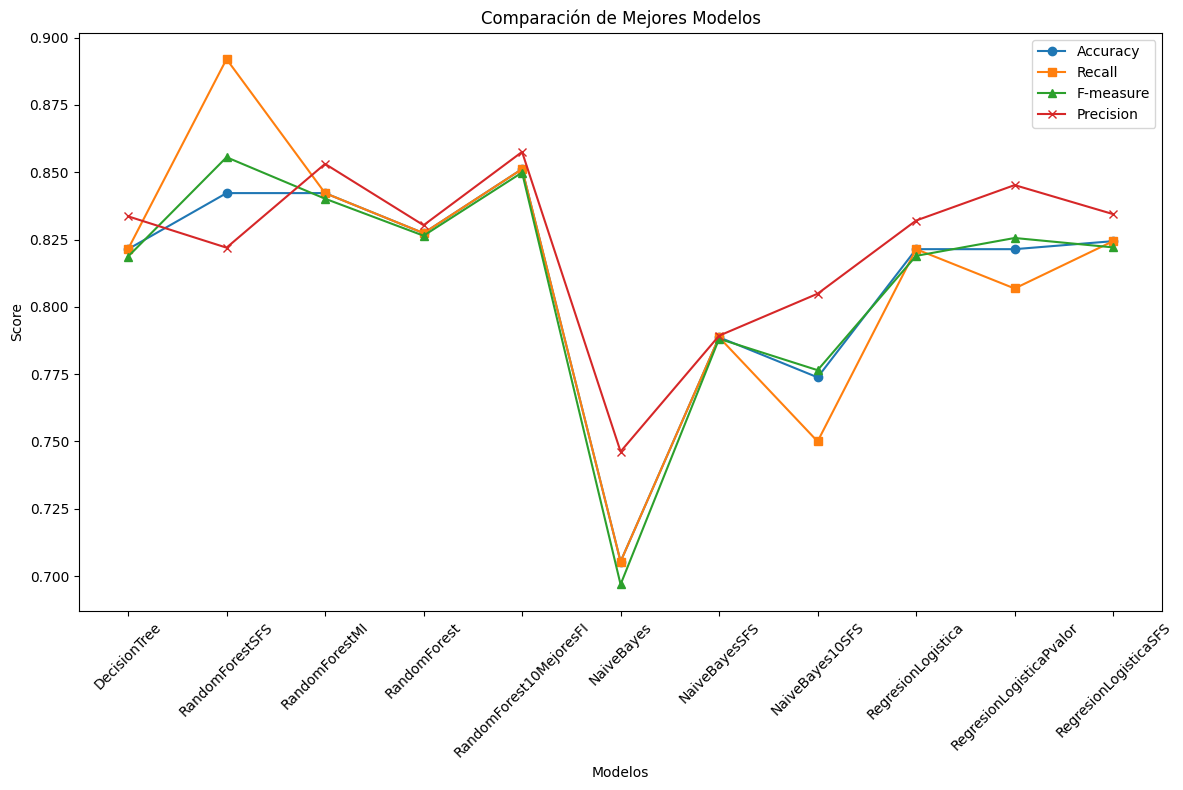

Mejor Modelo General Encontrado:
Modelo: RandomForestSFS - Best Model - n_estimators: 25, max_depth: 7, average: binary
Accuracy: 0.8422619047619048
Recall: 0.8920454545454546
F-measure: 0.8555858310626703
Precision: 0.8219895287958116


In [36]:
# Inicializamos un diccionario para almacenar los mejores modelos por cada etiqueta
best_models_per_label = {}

# Buscar el mejor modelo por cada etiqueta
for model, metrics in results.items():
    best_metrics_for_model = {"config": "", "metrics": {"accuracy": 0, "recall": 0, "f_measure": 0, "precision": 0}}
    
    # Buscar el mejor modelo para cada conjunto de métricas
    for config, values in metrics.items():
        precision = values.get("precision", 0)  # Obtener precisión si está disponible
        average_score = (values["accuracy"] + values["recall"] + values["f_measure"] + precision) / 4
        if average_score > (sum(best_metrics_for_model["metrics"].values()) / 4):
            best_metrics_for_model["config"] = config
            best_metrics_for_model["metrics"] = values

    # Almacenamos el mejor modelo encontrado para esa etiqueta
    best_models_per_label[model] = best_metrics_for_model

# Mostrar el mejor modelo de cada etiqueta
for model, best_model in best_models_per_label.items():
    print(f"Mejor modelo para {model}:")
    print(f"Configuración: {best_model['config']}")
    print(f"Accuracy: {best_model['metrics']['accuracy']}")
    print(f"Recall: {best_model['metrics']['recall']}")
    print(f"F-measure: {best_model['metrics']['f_measure']}")
    print(f"Precision: {best_model['metrics'].get('precision', 0)}")
    print("\n")

# Comparar los mejores modelos de cada etiqueta gráficamente
model_names = list(best_models_per_label.keys())
accuracies = [best_models_per_label[model]["metrics"]["accuracy"] for model in model_names]
recalls = [best_models_per_label[model]["metrics"]["recall"] for model in model_names]
f_measures = [best_models_per_label[model]["metrics"]["f_measure"] for model in model_names]
precisions = [best_models_per_label[model]["metrics"].get("precision", 0) for model in model_names]

# Graficamos la comparación
x = range(len(model_names))
plt.figure(figsize=(12, 8))
plt.plot(x, accuracies, label="Accuracy", marker='o')
plt.plot(x, recalls, label="Recall", marker='s')
plt.plot(x, f_measures, label="F-measure", marker='^')
plt.plot(x, precisions, label="Precision", marker='x')  # Nueva línea para precisión

# Etiquetas en el eje x
plt.xticks(x, model_names, rotation=45)
plt.xlabel("Modelos")
plt.ylabel("Score")
plt.title("Comparación de Mejores Modelos")
plt.legend()
plt.tight_layout()
plt.show()

# Encontrar el mejor modelo entre todos los modelos comparados
best_model_overall = max(
    best_models_per_label.items(),
    key=lambda item: (item[1]["metrics"]["accuracy"] + item[1]["metrics"]["recall"] +
                      item[1]["metrics"]["f_measure"] + item[1]["metrics"].get("precision", 0)) / 4
)

# Mostrar el mejor modelo entre todos
print("Mejor Modelo General Encontrado:")
print(f"Modelo: {best_model_overall[0]} - {best_model_overall[1]['config']}")
print(f"Accuracy: {best_model_overall[1]['metrics']['accuracy']}")
print(f"Recall: {best_model_overall[1]['metrics']['recall']}")
print(f"F-measure: {best_model_overall[1]['metrics']['f_measure']}")
print(f"Precision: {best_model_overall[1]['metrics'].get('precision', 0)}")


Mejor modelo para DecisionTree:
Configuración: Best Model - criterion: entropy, max_depth: 5, class_weight: {0: 0.4, 1: 0.6}, average: weighted
Accuracy: 0.8214285714285714
Recall: 0.8214285714285714
F-measure: 0.818678730595829
Precision: 0.8336356764928193


Mejor modelo para RandomForestSFS:
Configuración: Best Model - n_estimators: 25, max_depth: 7, average: binary
Accuracy: 0.8422619047619048
Recall: 0.8920454545454546
F-measure: 0.8555858310626703
Precision: 0.8219895287958116


Mejor modelo para RandomForestMI:
Configuración: Best Model - n_estimators: 20, max_depth: 4, class_weight: {0: 1, 1: 2}, average: weighted
Accuracy: 0.8422619047619048
Recall: 0.8422619047619048
F-measure: 0.8401855597099844
Precision: 0.8531144173206864


Mejor modelo para RandomForest:
Configuración: Best Model - n_estimators: 22, max_depth: 4, average: weighted
Accuracy: 0.8273809523809523
Recall: 0.8273809523809523
F-measure: 0.8264355178262464
Precision: 0.8303290533579484


Mejor modelo para Random

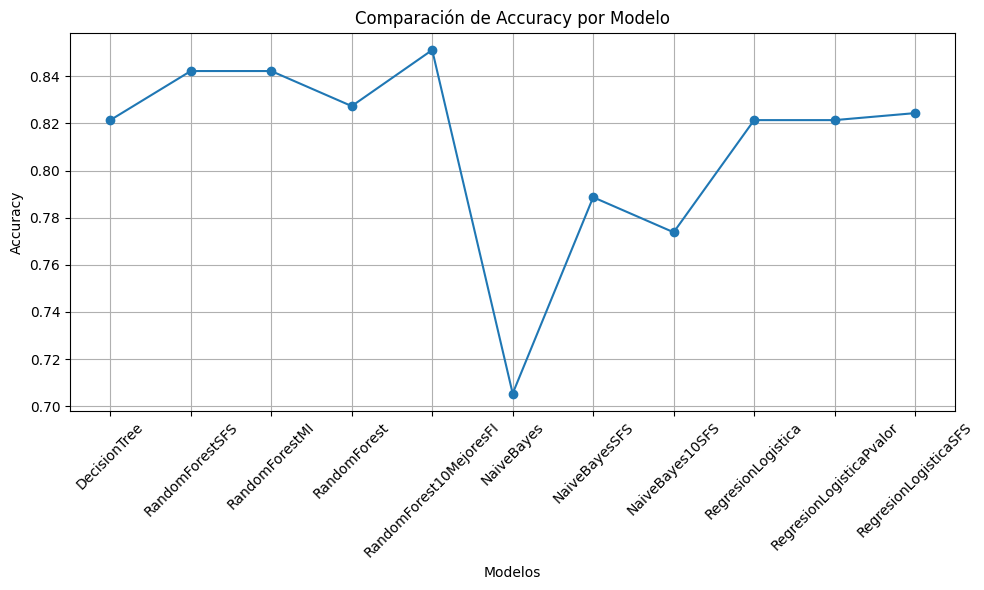

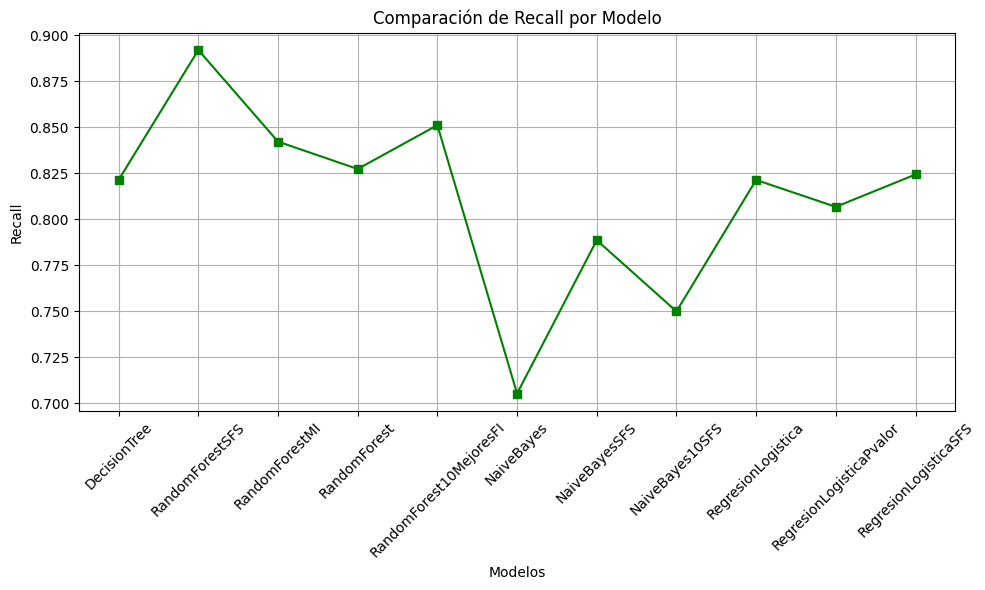

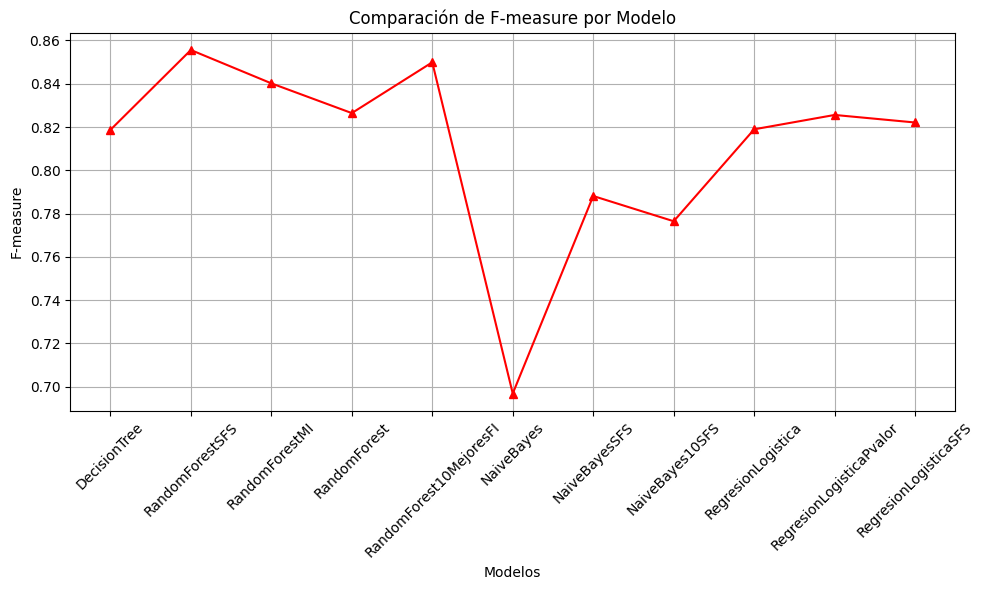

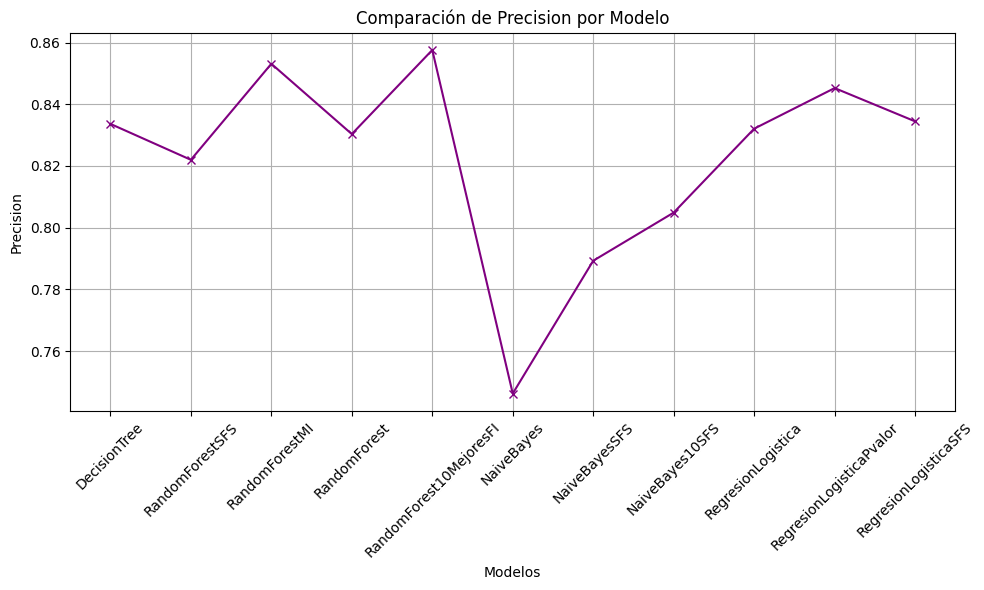

Mejor Modelo General Encontrado:
Modelo: RandomForestSFS - Best Model - n_estimators: 25, max_depth: 7, average: binary
Accuracy: 0.8422619047619048
Recall: 0.8920454545454546
F-measure: 0.8555858310626703
Precision: 0.8219895287958116


In [37]:
# Inicializamos un diccionario para almacenar los mejores modelos por cada etiqueta
best_models_per_label = {}

# Buscar el mejor modelo por cada etiqueta
for model, metrics in results.items():
    best_metrics_for_model = {"config": "", "metrics": {"accuracy": 0, "recall": 0, "f_measure": 0, "precision": 0}}
    
    # Buscar el mejor modelo para cada conjunto de métricas
    for config, values in metrics.items():
        precision = values.get("precision", 0)  # Obtener precisión si está disponible
        average_score = (values["accuracy"] + values["recall"] + values["f_measure"] + precision) / 4
        if average_score > (sum(best_metrics_for_model["metrics"].values()) / 4):
            best_metrics_for_model["config"] = config
            best_metrics_for_model["metrics"] = values

    # Almacenamos el mejor modelo encontrado para esa etiqueta
    best_models_per_label[model] = best_metrics_for_model

# Mostrar el mejor modelo de cada etiqueta
for model, best_model in best_models_per_label.items():
    print(f"Mejor modelo para {model}:")
    print(f"Configuración: {best_model['config']}")
    print(f"Accuracy: {best_model['metrics']['accuracy']}")
    print(f"Recall: {best_model['metrics']['recall']}")
    print(f"F-measure: {best_model['metrics']['f_measure']}")
    print(f"Precision: {best_model['metrics'].get('precision', 0)}")
    print("\n")

# Comparar los mejores modelos de cada etiqueta gráficamente
import matplotlib.pyplot as plt

model_names = list(best_models_per_label.keys())
accuracies = [best_models_per_label[model]["metrics"]["accuracy"] for model in model_names]
recalls = [best_models_per_label[model]["metrics"]["recall"] for model in model_names]
f_measures = [best_models_per_label[model]["metrics"]["f_measure"] for model in model_names]
precisions = [best_models_per_label[model]["metrics"].get("precision", 0) for model in model_names]

# Graficamos Accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', label="Accuracy")
plt.xlabel("Modelos")
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy por Modelo")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficamos Recall
plt.figure(figsize=(10, 6))
plt.plot(model_names, recalls, marker='s', label="Recall", color='green')
plt.xlabel("Modelos")
plt.ylabel("Recall")
plt.title("Comparación de Recall por Modelo")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficamos F-measure
plt.figure(figsize=(10, 6))
plt.plot(model_names, f_measures, marker='^', label="F-measure", color='red')
plt.xlabel("Modelos")
plt.ylabel("F-measure")
plt.title("Comparación de F-measure por Modelo")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficamos Precision
plt.figure(figsize=(10, 6))
plt.plot(model_names, precisions, marker='x', label="Precision", color='purple')
plt.xlabel("Modelos")
plt.ylabel("Precision")
plt.title("Comparación de Precision por Modelo")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Encontrar el mejor modelo entre todos los modelos comparados
best_model_overall = max(
    best_models_per_label.items(),
    key=lambda item: (item[1]["metrics"]["accuracy"] + item[1]["metrics"]["recall"] +
                      item[1]["metrics"]["f_measure"] + item[1]["metrics"].get("precision", 0)) / 4
)

# Mostrar el mejor modelo entre todos
print("Mejor Modelo General Encontrado:")
print(f"Modelo: {best_model_overall[0]} - {best_model_overall[1]['config']}")
print(f"Accuracy: {best_model_overall[1]['metrics']['accuracy']}")
print(f"Recall: {best_model_overall[1]['metrics']['recall']}")
print(f"F-measure: {best_model_overall[1]['metrics']['f_measure']}")
print(f"Precision: {best_model_overall[1]['metrics'].get('precision', 0)}")


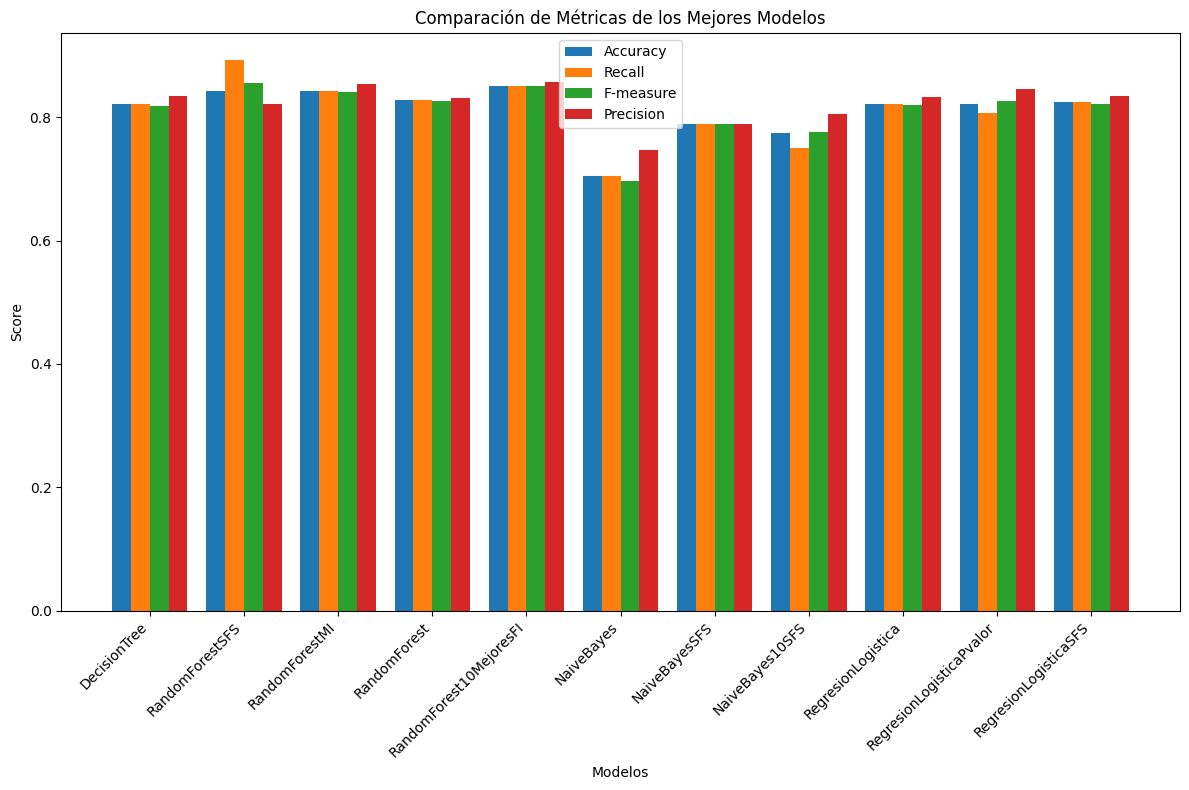

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los mejores modelos
model_names = list(best_models_per_label.keys())
accuracies = [best_models_per_label[model]["metrics"]["accuracy"] for model in model_names]
recalls = [best_models_per_label[model]["metrics"]["recall"] for model in model_names]
f_measures = [best_models_per_label[model]["metrics"]["f_measure"] for model in model_names]
precisions = [best_models_per_label[model]["metrics"].get("precision", 0) for model in model_names]

# Configuración del gráfico de barras agrupadas
x = np.arange(len(model_names))  # Índices para los modelos
width = 0.2  # Ancho de las barras

# Crear gráfico
plt.figure(figsize=(12, 8))
plt.bar(x - 1.5 * width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5 * width, recalls, width, label='Recall')
plt.bar(x + 0.5 * width, f_measures, width, label='F-measure')
plt.bar(x + 1.5 * width, precisions, width, label='Precision')

# Etiquetas y títulos
plt.xticks(x, model_names, rotation=45, ha="right")
plt.xlabel("Modelos")
plt.ylabel("Score")
plt.title("Comparación de Métricas de los Mejores Modelos")
plt.legend()

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfico
plt.show()